# install tweepy

In [1]:
!pip install tweepy

# import libraries python

* used NLP and NLTK with wordnet et stopwords

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tweepy
import csv
import os
import pandas as pd

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Read our dasasets**

In [3]:
datasets = pd.read_csv('../input/clustering/data.csv' )

In [4]:
datasets.head()


,user,Text
0,ReaveleyBarbara,@TruthOuter @lara_lazar “Those who do not lear...
1,_letsbebadguys,"RT @Sillyshib: So, basically the government ar..."
2,aplemkseriously,RT @brooklynmarie: Today I got the idea to put...
3,FixSheltersNow,@B_J_Davis @NeilAxelrod @LisaMarieBoothe You m...
4,GrantThorntonAU,COVID has pressed the pause button on the econ...


In [5]:
datasets.shape

(20000, 2)

# Text Classification

1.  Cleaning the tweets

lemmatization, tokenizing, removing stopwards, punctuations, hashtags and mentions

In [6]:
# remove the hashtags, mentions and unwanted characters from the tweet texts
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

clean_tweets = clean_text(datasets, 'Text')
clean_tweets.head()

,user,Text
0,ReaveleyBarbara,lazar those who do not learn history are doom...
1,_letsbebadguys,so basically the government are playing chic...
2,aplemkseriously,today i got the idea to put together a threa...
3,FixSheltersNow,jdavis you must be kidding seriously begging...
4,GrantThorntonAU,covid has pressed the pause button on the econ...


remove stopwords, punctuations, lemmatize and tokenize word

In [7]:

#remove stopwords, punctuations, lemmatize and tokenize word
# nlp = spacy.load("en_core_web_sm")   #working with english only, no support for swahili
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
datasets.tweets = datasets.Text.apply(furnished)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [8]:
datasets.sample(5)

,user,Text
5280,Mayer__,a 9 meses de la pandemia en chile el viernes...
9942,JacksonLewisPC,cressinda chris schlag from our workplacesafet...
14501,HIHKatharine,trump asks pennsylvania house speaker for he...
7010,Jerianhypeman,cancel culture at its finest
13296,MSN,lawmakers vow to override trump veto of defens...


 2. Defining the set of words.

Related Words runs on several different algorithms which compete to get their results higher in the list. One such algorithm uses ***word embedding*** to convert words into many dimensional vectors which represent their meanings

Word embedding is any of a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.

Link to obtain Related Words: https://relatedwords.org/

In [9]:
sport_related_words = '''game disport play foul player mountaineer hunt fence archery sportive fencing jest SUV Boxer sporting
sporty pastime fishing attack big game falconry gaud sportless ring sports sailing cross-country hunting skateboarding
caving shikar ski surfing turf lake racing preserve
professional box angling discus spectator sport toy dive pothunter boxing foil crew shoot pro course fisherman skiing fun rowing fancy
hunter trapshooting skating mock judo sportswear mountaineering lark cycling running riding action sport bowl
waggish sportful field multisport yachting titlist blood sport race snowboarding javelin sportsmanship wanton weightlifting mockery racket put fan shooting sail law
letter championship coursing sporting fish skylark speed skating amateur laugh sports diving ploy climber climb sports diver season
kendo letterman swordsman chase daff hammer ballooning surfboarding run wrestle angler the chase fandom paragliding semiprofessional mimic runner quarry slalom game fish
activewear scuba diving trainer sportswoman venery luge score tobogganing kiteboarding autocross harlequin wrestling major league unsportsmanlike bait ball junior
sportfishing hack synchronized swimming windsurfing falconer train crown stuff defender SUB sky divingtyro
pickerel marlin gymnastics crewman netball rage challenge coasteering aficionado langlauf dandiprat spike fool rulebook cave fox hunt
wrestler blinder sport vehicle track team joke tubing extreme freediving game bird horse riding referee
snowmobiling kit rallying fall sportsperson DCMS speleology marlock rodeo kickball tussle spelunking slump pot racquetball canoeing block dodgeball turn pro
broomball commissioner celebrity fumble the top flight sported split time fencer horse racing sport fish
goody fox-hunting artistry all-rounder skeleton pro shop ice-skating duffer trash-talk spot bobsledding gamy pig-sticking retire
surfer fight misplay rabbit sporting celebrity harness racing survivalist preseason
sack try out fisher archer bouldering Dove devotee convert camogie mixed martial arts sim suit up mimicry throw hustle canyoneering sabre hoax pheasant dummy ringed rang AIS territory double bouncebackability mumm extreme sport rung sportingly
jape fratch gamer scrimmage sideline ridicule bantam riflery widow close season base 
jumping allAmerican record  mountainboarding skijoring penalty gamesome merrymaking '''


In [10]:
politics_related_words = '''diplomatic government law election aristotle diplomatical political science
political parties politics ethics sovereign state suave smooth tribe republic dynasty expedient sagacious politician direct democracy political economy international relations
state public policy power public administration city polis greek language social status border political system niccolò machiavelli thomas hobbes war nationalism technocracy society reactionary anarchism centrism russian empire ottoman empire absolute monarchy constitutions political geography bland monarchy pluralism legislature executive judiciary democracy comparative politics
resource academy negotiation force warfare clans tribes company aristocracy plato political philosophy culture chanakya country confucius sic religion governance normative utopia decision-making
chimpanzee confederation frontier federation
chiefdom africa oasis sumer arthashastra mesopotamia terrorism river kleptocracy athens moralism nations christianism
inveterately contradictive mobocracy equalitarian sermonise christianly mudslinger
statesmanly sloganeer technocratic megalomanic westernism passivism russophile stateless society ancient civilizations psychodrama
self-perpetuating first civilization balkanized piercer
clubby internalised band society reflation nontransparent kafkaesque postindustrial unsustainability overregulated conflict theories
atomized uruk period self-regulating predynastic egypt hidebound nonideological wrongness nile river dispassion fragmenting squishy heteronormative depersonalized metabolizes oligarchy persian gulf covenantal autocracy
euphrates river microbiota legitimacy shapers
tigris river solipsistic originalism seven-man standard-setting groupthink eviscerated
146-nation classical antiquity neuropolitics greek city states ancient rome referendum nation-state athenian democracy peace of westphalia emer de vattel
behavioralism position post-structuralism austrian empire
plutocracy kingdom of france kingdom of hungary theocracy spanish empire dictatorship british empire muslim world death of muhammad
revolution issue federalism drunk driving australia polity 
san marino mass media dutch republic steven weber david woodward michel fouc '''

In [11]:
economy_related_words = '''agriculture infrastructure capitalism trading service sector technology  economical supply 
                          industrialism efficiency frugality retrenchment downsizing   credit debit value 
                         economize   save  economically
                         economies sluggish rise   rising spending conserve trend 
                         low-management  decline   industry impact poor  
                            profession    surplus   fall
                         declining  accelerating interest sectors balance stability productivity increase rates
                            pushing expanding stabilize  rate industrial borrowing struggling
                           deficit predicted    increasing  data
                          economizer analysts investment market-based economy   debt free enterprise
                         medium  exchange metric savepoint scarcity capital bank company stockholder fund business  
                         asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics
                         bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation 
                         quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital
                         mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution
                         bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter 
                         distribution downturn economist'''

In [12]:
social_related_words = '''sociable, gregarious societal friendly society socialization political  sociality 
                        interpersonal  ethnic socially party welfare public community socialist societies development
                            network humans socialism collective personal corporation social constructivism
                        relations volition citizenship brute   attitude rights socio 
                        socioeconomic ethics civic communal marital  sociale socialized communities     
                         policy   unions        
                        institutions values     governmental   organizations jamboree 
                         festivity    fairness  support  care  
                         sides   activism     unsocial psychosocial 
                        socializing psychological distributional  demographic  participation reunion 
                        partygoer partyism festive power network gala housewarming celebration counterparty   social-war
                        particularist interactional ideational asocial'''

In [13]:
culture_related_words  = ''' ethnicity heritage modernity spirituality marxismmaterial culture 
                           ethos nationality humanism romanticism civilisation traditionalism genetics
                        kinship heredity marriage   indigenous  archeology  acculturate  
                       ontogenesis viniculture modern clothes     rooted 
                       cicero societies history roots influence geography historical folk origins 
                       phenomenon teleology ancient aspects perspective liberalism nowadays community style unique prevalent describes 
                         today  origin   modernity beliefs  genre barbarian ethnic 
                       colonization cultural universal organization western-civilization structuralism  culture 
                       heathen pagan transculturation culture peasant classicist nativism anarchy ungrown philosophic cult  
                       consciousness islamist bro-culture evolve cultic diaspora aftergrowth native cultural-relativism  
                       mongolian cosmopolitan epistemology lifestyles diversity chauvinism westernization materialism vernacular 
                       homogeneity otherness holism tusculanae disputationes primitivism superficiality hedonism discourse
                       puritanism modernism intellectualism  exclusiveness elitism  colonialism  
                       pentecostalism paganism nationwide expansion rural  auxesis kimono 
                       culturize alethophobia nettlebed japanification  dongyi clannishness insularity hybridity
                       westernisation foreignness worldview exclusionism enculturation ethnocentrism  confucianist vulgarization
                       shintoism  westernism denominationalism    deracination
                        eurocentrism  cosmologies  emotiveness bohemianism territorialism
                       philosophical-doctrine ethnic minority social-darwinism  theory cultural evolution belief systemfolk music 
                       traditional art house karl-marx   theorymedia  
                       film-theory art history museum studies cultural artifact'''

In [14]:
health_related_words = '''disease obesity world health organization medicine nutrition well-being exercise welfare wellness health care public health 
                     nursing stress safety hygiene research social healthy condition aids epidemiology healthiness wellbeing
                     care illness medical dieteducation infectious disease environmental healthcare physical fitness hospitals 
                     health care provider doctors healthy community design insurance sanitation human body patient mental health
                      medicare agriculture health science fitnesshealth policy  weight loss physical therapy psychology pharmacy
                     metabolic organism human lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family
                     eudaimonia eudaemonia air house prevention genetics public families poor needs treatment communicable disease 
                     study protection malaria development food priority management healthful mental provide department administration
                     programs help assistance funding environment improving emergency need program affected schools private mental illness 
                     treat diseases preparedness perinatal fertility sickness veterinary sanitary pharmacists behavioral midwives
                     gerontology infertility hospitalization midwifery cholesterol childcare pediatrician pediatrics medicaid asthma 
                     pensions sicknesses push-up physical education body-mass-index eat well gymnastic apparatus tune up good morning 
                     bathing low blood-pressure heart attack health club ride-bike you feel good eczema urticaria dermatitis sunburn overwork 
                     manufacturing medical sociology need exercise run'''


3. Preprocessing the datasets

Tokenizing and removing stop words from the datasets

In [15]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [16]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)
politics = furnished(politics_related_words)
sport = furnished(sport_related_words)


Removing duplicates

In [17]:
string1 = sport
words = string1.split()
sport = " ".join(sorted(set(words), key=words.index))
sport

'game disport play foul player mountaineer hunt fence archery sportive fencing jest suv boxer sporting sporty pastime fishing attack big falconry gaud sportless ring sport sailing cross-country hunting skateboarding caving shikar ski surfing turf lake racing preserve professional box angling discus spectator toy dive pothunter boxing foil crew shoot pro course fisherman skiing fun rowing fancy hunter trapshooting skating mock judo sportswear mountaineering lark cycling running riding action bowl waggish sportful field multisport yachting titlist blood race snowboarding javelin sportsmanship wanton weightlifting mockery racket put fan shooting sail law letter championship coursing fish skylark speed amateur laugh diving ploy climber climb diver season kendo letterman swordsman chase daff hammer ballooning surfboarding run wrestle angler fandom paragliding semiprofessional mimic runner quarry slalom activewear scuba trainer sportswoman venery luge score tobogganing kiteboarding autocross

In [18]:
string1 = politics
words = string1.split()
politics = " ".join(sorted(set(words), key=words.index))
politics

'diplomatic government law election aristotle diplomatical political science party politics ethic sovereign state suave smooth tribe republic dynasty expedient sagacious politician direct democracy economy international relation public policy power administration city polis greek language social status border system niccolò machiavelli thomas hobbes war nationalism technocracy society reactionary anarchism centrism russian empire ottoman absolute monarchy constitution geography bland pluralism legislature executive judiciary comparative resource academy negotiation force warfare clan company aristocracy plato philosophy culture chanakya country confucius sic religion governance normative utopia decision-making chimpanzee confederation frontier federation chiefdom africa oasis sumer arthashastra mesopotamia terrorism river kleptocracy athens moralism nation christianism inveterately contradictive mobocracy equalitarian sermonise christianly mudslinger statesmanly sloganeer technocratic 

In [19]:
# delete duplicates
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy

'agriculture infrastructure capitalism trading service sector technology economical supply industrialism efficiency frugality retrenchment downsizing credit debit value economize save economically economy sluggish rise rising spending conserve trend low-management decline industry impact poor profession surplus fall declining accelerating interest balance stability productivity increase rate pushing expanding stabilize industrial borrowing struggling deficit predicted increasing data economizer analyst investment market-based debt free enterprise medium exchange metric savepoint scarcity capital bank company stockholder fund business asset treasury tourism income contraction employment job upturn deflation macroeconomics bankruptcy exporter hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture mutual plan mortgage lender unemployment crunch central financial 

In [20]:
string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))
social

'sociable, gregarious societal friendly society socialization political sociality interpersonal ethnic socially party welfare public community socialist development network human socialism collective personal corporation social constructivism relation volition citizenship brute attitude right socio socioeconomic ethic civic communal marital sociale socialized policy union institution value governmental organization jamboree festivity fairness support care side activism unsocial psychosocial socializing psychological distributional demographic participation reunion partygoer partyism festive power gala housewarming celebration counterparty social-war particularist interactional ideational asocial'

In [21]:
string1 = culture
words = string1.split()
culture = " ".join(sorted(set(words), key=words.index))
culture

'ethnicity heritage modernity spirituality marxismmaterial culture ethos nationality humanism romanticism civilisation traditionalism genetics kinship heredity marriage indigenous archeology acculturate ontogenesis viniculture modern clothes rooted cicero society history root influence geography historical folk origin phenomenon teleology ancient aspect perspective liberalism nowadays community style unique prevalent describes today belief genre barbarian ethnic colonization cultural universal organization western-civilization structuralism heathen pagan transculturation peasant classicist nativism anarchy ungrown philosophic cult consciousness islamist bro-culture evolve cultic diaspora aftergrowth native cultural-relativism mongolian cosmopolitan epistemology lifestyle diversity chauvinism westernization materialism vernacular homogeneity otherness holism tusculanae disputationes primitivism superficiality hedonism discourse puritanism modernism intellectualism exclusiveness elitism 

In [22]:
string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))
health

'disease obesity world health organization medicine nutrition well-being exercise welfare wellness care public nursing stress safety hygiene research social healthy condition aid epidemiology healthiness wellbeing illness medical dieteducation infectious environmental healthcare physical fitness hospital provider doctor community design insurance sanitation human body patient mental medicare agriculture science fitnesshealth policy weight loss therapy psychology pharmacy metabolic organism lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family eudaimonia eudaemonia air house prevention genetics poor need treatment communicable study protection malaria development food priority management healthful provide department administration program help assistance funding environment improving emergency affected school private treat preparedness perinatal fertility sickness veterinary sanitary pharmacist behavioral midwife gerontology infertility hospitalization 


4. Vectorizing and Standadization.¶


Vectorizing the sets of words, then standardizing them. TFIDF will be used in order to take care of the least frequent words. Standardizing is cause TFIDF favors long sentences and there'll be inconsistencies between the length of the tweets and the length of set of words.


In [23]:
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [24]:
socialvector = get_vectors(social)
economic_vector = get_vectors(economy)
culture_vector = get_vectors(culture)
health_vector = get_vectors(health)
politics_vector = get_vectors(politics)
sport_vector = get_vectors(sport)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass input=['sociable, gregarious societal friendly society socialization political sociality interpersonal ethnic socially party welfare public community socialist development network human socialism collective personal corporation social constructivism relation volition citizenship brute attitude right socio socioeconomic ethic civic communal marital sociale socialized policy union institution value governmental organization jamboree festivity fairness support care side activism unsocial psychosocial socializing psychological distributional demographic participation reunion partygoer partyism festive power gala housewarming celebration counterparty social-war particularist interactional ideational asocial'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarn

In [25]:
## Vectorizing the tweets
tv=TfidfVectorizer()
# tweets_bowl = tweets_bowl.tweets.apply(get_vectors)
# tweets_bowl.head()
tfidf_tweets =tv.fit_transform(datasets.tweets)

# Jaccard Similarity

Jaccard similarity is good for cases where duplication does not matter, 
cosine similarity is good for cases where duplication matters while analyzing text similarity. For two product descriptions, 
it will be better to use Jaccard similarity as repetition of a word does not reduce their similarity.


In [26]:

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
# jaccard_score(socialvector, economic_vector)

#for similarity of 1 and 2 of column1
# jaccard_similarity('dog lion a dog','dog is cat')


def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [27]:
#sport scores
sp_scores = get_scores(sport, datasets.tweets.to_list())
sp_scores[:10]

[0.6785714285714286,
 0.8214285714285714,
 0.6785714285714286,
 0.7142857142857143,
 0.75,
 0.8214285714285714,
 0.09375,
 0.6785714285714286,
 0.6785714285714286,
 0.5714285714285714]

In [28]:
# politics scores
p_scores = get_scores(politics, datasets.tweets.to_list())
p_scores[:10]

[0.59375,
 0.71875,
 0.59375,
 0.625,
 0.65625,
 0.71875,
 0.11428571428571428,
 0.59375,
 0.59375,
 0.5]

In [29]:
# economic scores
e_scores = get_scores(economy, datasets.tweets.to_list())
e_scores[:10]

[0.6785714285714286,
 0.8214285714285714,
 0.6785714285714286,
 0.7142857142857143,
 0.75,
 0.8214285714285714,
 0.09375,
 0.6785714285714286,
 0.6785714285714286,
 0.5714285714285714]

In [30]:
# social scores
s_scores = get_scores(social, datasets.tweets.to_list())
s_scores[:10]

[0.7037037037037037,
 0.7857142857142857,
 0.7037037037037037,
 0.7407407407407407,
 0.7777777777777778,
 0.8518518518518519,
 0.0967741935483871,
 0.7037037037037037,
 0.7037037037037037,
 0.5925925925925926]

In [31]:
# culture scores
c_scores = get_scores(culture, datasets.tweets.to_list())
c_scores[:10]

[0.6785714285714286,
 0.8214285714285714,
 0.6785714285714286,
 0.7142857142857143,
 0.75,
 0.8214285714285714,
 0.09375,
 0.6785714285714286,
 0.6785714285714286,
 0.5714285714285714]

In [32]:
# health scores
h_scores = get_scores(health, datasets.tweets.to_list())
h_scores[:10]

[0.7307692307692307,
 0.8148148148148148,
 0.7307692307692307,
 0.7037037037037037,
 0.8076923076923077,
 0.8846153846153846,
 0.1,
 0.6666666666666666,
 0.7307692307692307,
 0.6153846153846154]

In [33]:
'''new df with names, and the jaccard scores for each group'''

data  = {'names':datasets.user.to_list(), 'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores,'politics_scores':p_scores,'sport_scores':sp_scores}
scores_df = pd.DataFrame(data)
scores_df.head(10)

,names,economic_score,social_score,culture_score,health_scores,politics_scores,sport_scores
0,ReaveleyBarbara,0.678571,0.703704,0.678571,0.730769,0.593750,0.678571
1,_letsbebadguys,0.821429,0.785714,0.821429,0.814815,0.718750,0.821429
2,aplemkseriously,0.678571,0.703704,0.678571,0.730769,0.593750,0.678571
3,FixSheltersNow,0.714286,0.740741,0.714286,0.703704,0.625000,0.714286
4,GrantThorntonAU,0.750000,0.777778,0.750000,0.807692,0.656250,0.750000
5,tacayler,0.821429,0.851852,0.821429,0.884615,0.718750,0.821429
6,OcKLQmEF8X7xluj,0.093750,0.096774,0.093750,0.100000,0.114286,0.093750
7,HalfonJulien,0.678571,0.703704,0.678571,0.666667,0.593750,0.678571
8,DrAparnaBole,0.678571,0.703704,0.678571,0.730769,0.593750,0.678571
9,JimmyDun,0.571429,0.592593,0.571429,0.615385,0.500000,0.571429


* Actual assigning of classes to the tweets

In [34]:
def get_clusters(l1, l2, l3, l4,l5,l6):
    econ = []
    socio = []
    cul = []
    heal = []
    poli = []
    spor = []
    for i, j, k, l, p, s in zip(l1, l2, l3, l4,l5, l6):
        m = max(i, j, k, l, p, s)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
        if m == p:
            poli.append(1)
        else:
            poli.append(0) 
        if m == s:
            spor.append(1)
        else:
            spor.append(0) 
    return econ, socio, cul, heal, poli, spor

In [35]:
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()
l5 = scores_df.politics_scores.to_list()
l6 = scores_df.sport_scores.to_list()
econ, socio, cul, heal, poli, spor = get_clusters(l1, l2, l3, l4, l5, l6)

In [36]:
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal, 'politics': poli, 'sport': spor}
cluster_df = pd.DataFrame(data)
cluster_df.head(10)

,name,economic,social,culture,health,politics,sport
0,ReaveleyBarbara,0,0,0,1,0,0
1,_letsbebadguys,1,0,1,0,0,1
2,aplemkseriously,0,0,0,1,0,0
3,FixSheltersNow,0,1,0,0,0,0
4,GrantThorntonAU,0,0,0,1,0,0
5,tacayler,0,0,0,1,0,0
6,OcKLQmEF8X7xluj,0,0,0,0,1,0
7,HalfonJulien,0,1,0,0,0,0
8,DrAparnaBole,0,0,0,1,0,0
9,JimmyDun,0,0,0,1,0,0


In [37]:
'''Due to the close similarity between the economic, social and health tweets, some tweets have multiple categories, 
so to take care of that the rows with a sum > 1 will have to share the categories. After this, clustering will take care 
of the fractions'''


a =  cluster_df[['economic', 'social', 'culture', 'health','politics', 'sport']].sum(axis = 1) > 1
c = cluster_df[['economic', 'social', 'culture', 'health','politics', 'sport']].sum(axis = 1)
# b = cluster_df.copy()
cluster_df.loc[(a), ['economic','social', 'culture', 'health','politics', 'sport']] = 1/c

In [38]:
cluster_df.shape

(20000, 7)

#  Clustered Datasets: Question 4

In [39]:
pivot_clusters = cluster_df.groupby(['name']).sum()
#pivot_clusters['economic'] = pivot_clusters['economic'].astype(int)
#pivot_clusters['social'] = pivot_clusters['social'].astype(int)
#pivot_clusters['culture'] = pivot_clusters['culture'].astype(int)
#pivot_clusters['health'] = pivot_clusters['health'].astype(int)
#pivot_clusters['politics'] = pivot_clusters['politics'].astype(int)
#pivot_clusters['sport'] = pivot_clusters['sport'].astype(int)
pivot_clusters['total'] = pivot_clusters['health'] + pivot_clusters['culture'] + pivot_clusters['social'] +  pivot_clusters['economic'] + pivot_clusters['politics'] + pivot_clusters['sport']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(18085, 7)


,economic,social,culture,health,politics,sport,total
name,,,,,,,
zulfanraga,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
zuneyaaa,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,2.0
zzsleeps,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
zzzbeeme,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
Total,682.500000,2897.500000,682.500000,15956.500000,906.500000,682.500000,21808.0


* A pie chart to display the total number of tweets in each category

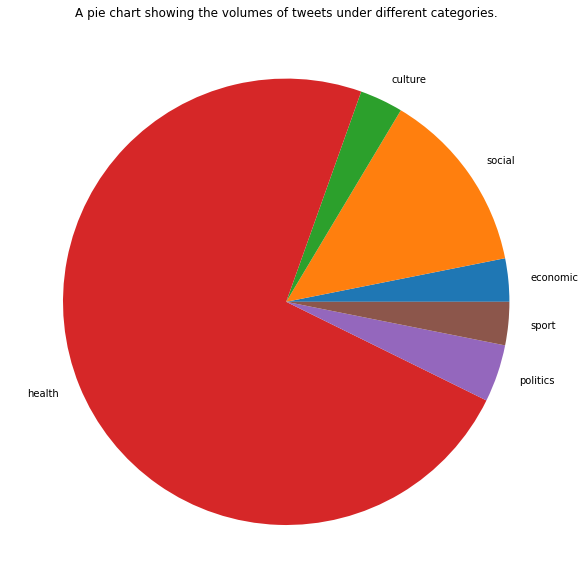

In [40]:
fig = plt.figure(figsize =(10, 20)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()

The huge percentage in health could be as a result of the current pandemic, Covid19, everyone is talking about it thus a huge volume of tweets. .

The social tweets follow, this could be related to the set of words defined as words related to social. Most of these terms are general, thus if a tweet that maybe was more economy related could have more social words than economy words and thus classified as social, so this is mainnly a bias in the classification method.

* Users with most tweets

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'total tweets')

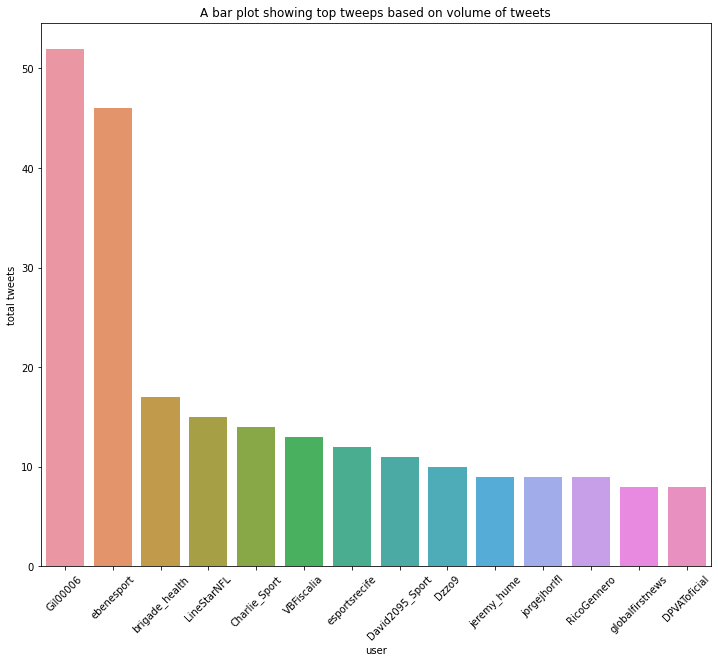

In [41]:
d = pivot_clusters.sort_values(by = 'total', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.total)
plt.title('A bar plot showing top tweeps based on volume of tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('total tweets')

Text(0, 0.5, 'sport tweets')

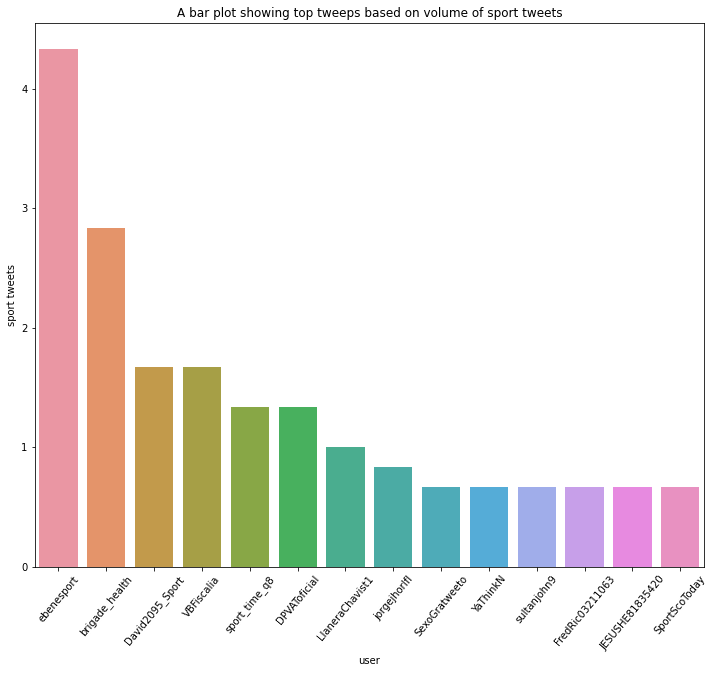

In [42]:
d = pivot_clusters.sort_values(by = 'sport', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.sport)
plt.title('A bar plot showing top tweeps based on volume of sport tweets')
plt.xticks(rotation=50)
plt.xlabel('user')
plt.ylabel('sport tweets')

* Users with most politics tweets

Text(0, 0.5, 'politics tweets')

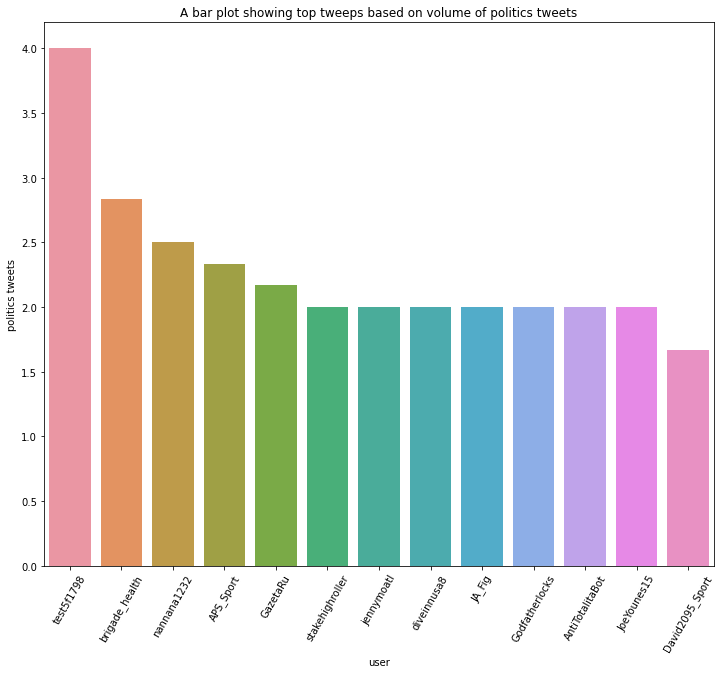

In [43]:
d = pivot_clusters.sort_values(by = 'politics', ascending  = False)
e = d.head(15)
e.drop(e.head(2).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.politics)
plt.title('A bar plot showing top tweeps based on volume of politics tweets')
plt.xticks(rotation=60)
plt.xlabel('user')
plt.ylabel('politics tweets')

*  Users with most economy tweets

Text(0, 0.5, 'economy tweets')

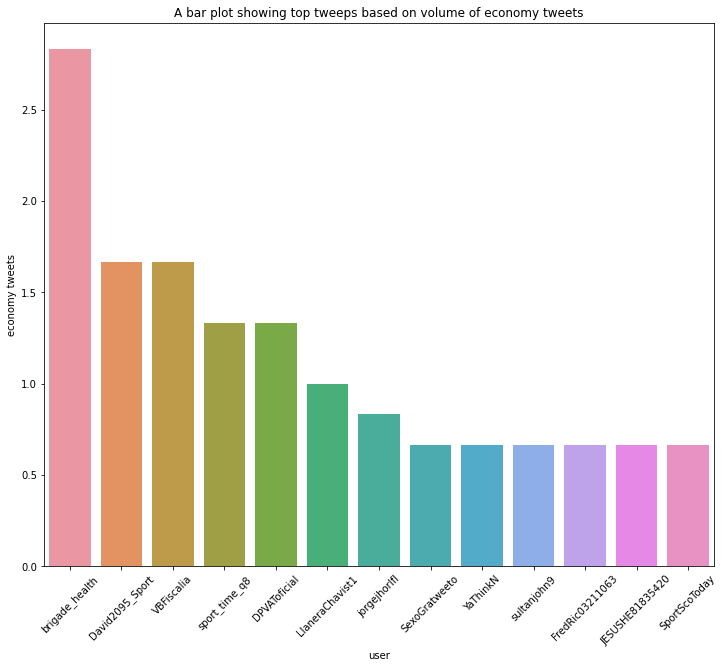

In [44]:
d = pivot_clusters.sort_values(by = 'economic', ascending  = False)
e = d.head(15)
e.drop(e.head(2).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.economic)
plt.title('A bar plot showing top tweeps based on volume of economy tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('economy tweets')

*  Users with most social tweets

Text(0, 0.5, 'social tweets')

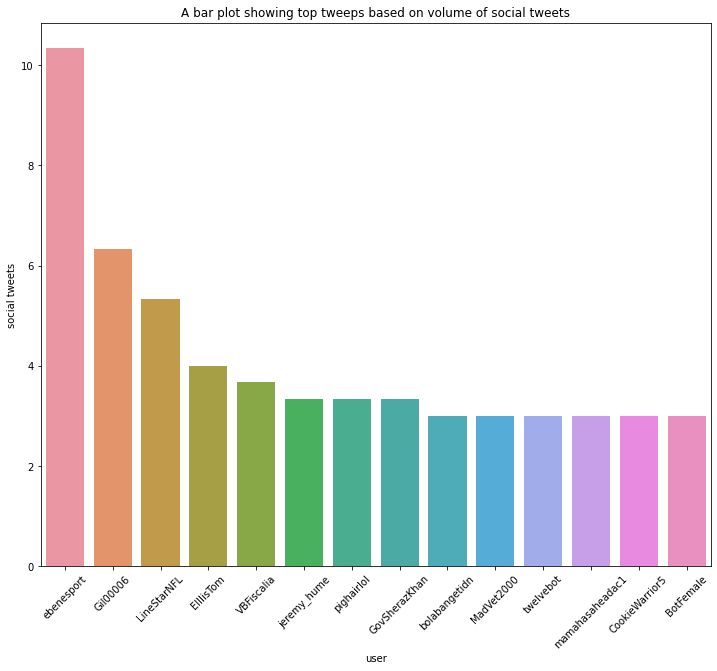

In [45]:
d = pivot_clusters.sort_values(by = 'social', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.social)
plt.title('A bar plot showing top tweeps based on volume of social tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('social tweets')

* Users with most culture tweets


Text(0, 0.5, 'culture tweets')

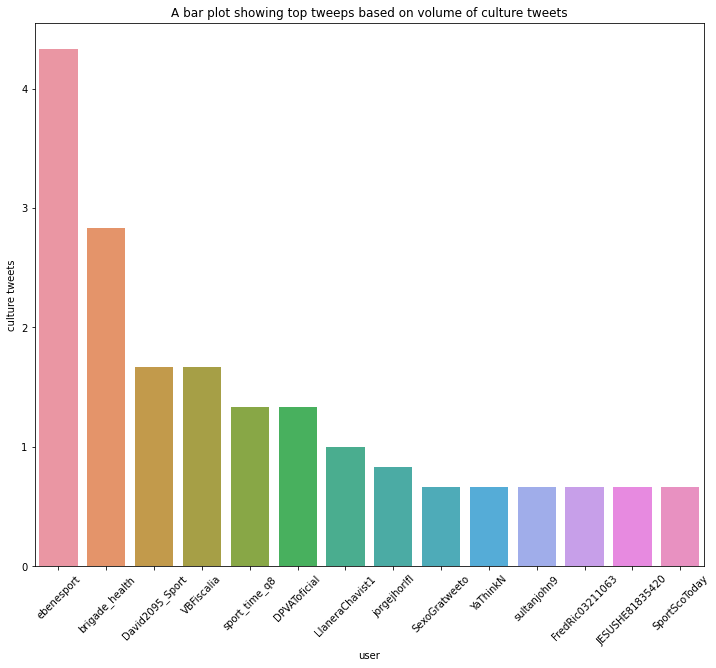

In [46]:
d = pivot_clusters.sort_values(by = 'culture', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.culture)
plt.title('A bar plot showing top tweeps based on volume of culture tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('culture tweets')

*  Users with most health tweets

Text(0, 0.5, 'health tweets')

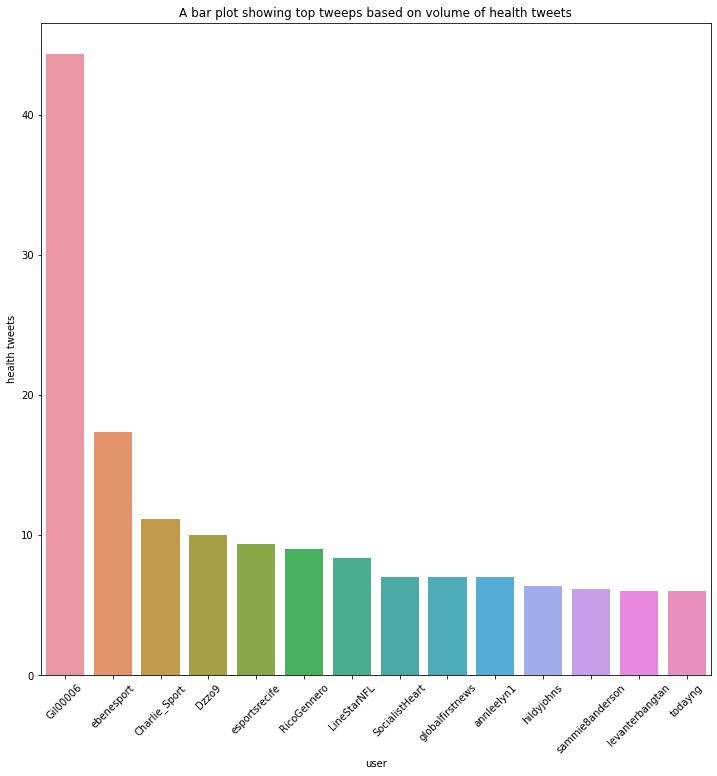

In [47]:
d = pivot_clusters.sort_values(by = 'health', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,12))
sns.barplot(x = e.index, y = e.health)
plt.title('A bar plot showing top tweeps based on volume of health tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('health tweets')

Distribution test and skewness

In [48]:
from statistics import mean
import re
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler

In [49]:
# drop the totals row.
print(pivot_clusters.shape)
pivot_clusters.drop(pivot_clusters.tail(1).index,inplace=True)
print(pivot_clusters.shape)

(18085, 7)
(18084, 7)


# KMeans Clustering.

2D Clusters


In [50]:
from sklearn.cluster import KMeans

* Politics-Sport

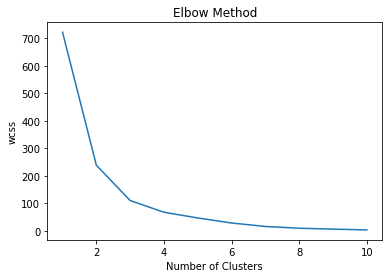

In [51]:
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['politics', 'sport']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

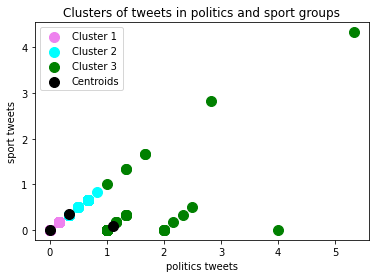

In [52]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
#plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
#plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in politics and sport groups')
plt.xlabel('politics tweets')
plt.ylabel('sport tweets')
plt.legend()
plt.show()

* Economic-Social

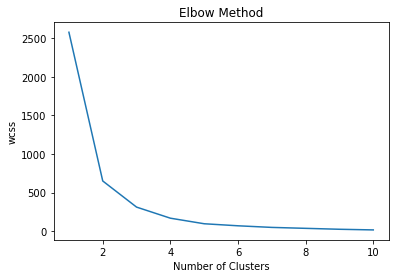

In [53]:
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['economic', 'social']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

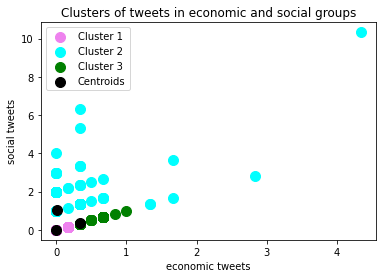

In [54]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and social groups')
plt.xlabel('economic tweets')
plt.ylabel('social tweets')
plt.legend()
plt.show()

* Sociol-Culture

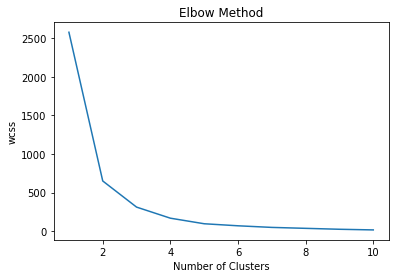

In [55]:

# X = pivot_clusters.iloc[:, [2,3]].values
X = pivot_clusters[['social', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

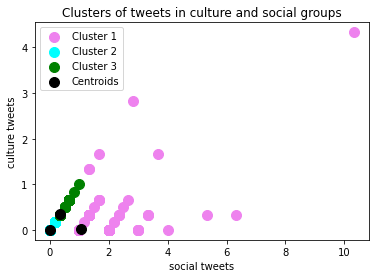

In [56]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in culture and social groups')
plt.xlabel('social tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()


* Sociol-Health

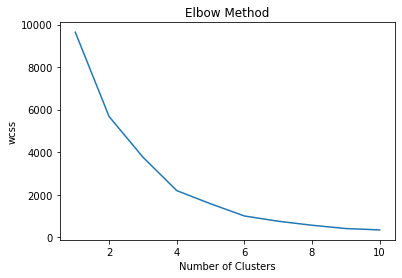

In [57]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['social', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

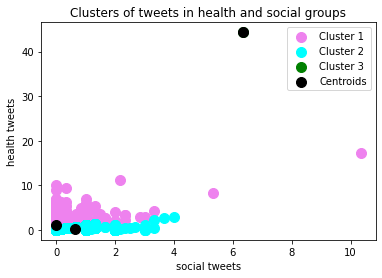

In [58]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in health and social groups')
plt.xlabel('social tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()


* Economic-health

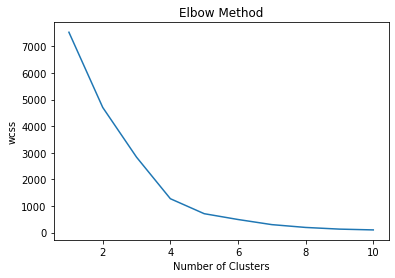

In [59]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['economic', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

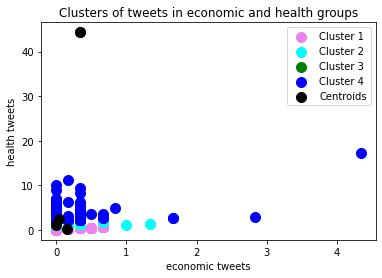

In [60]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
#plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and health groups')
plt.xlabel('economic tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()


Economic-Culture

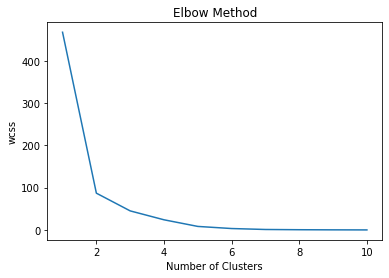

In [61]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['economic', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

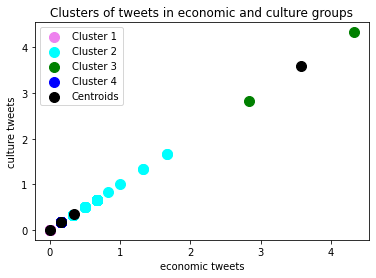

In [62]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and culture groups')
plt.xlabel('economic tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()


* Health-Culture

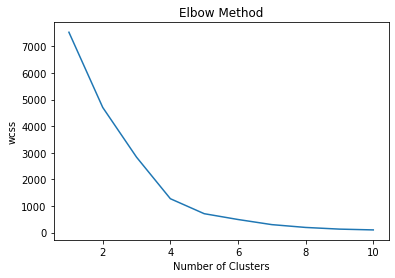

In [63]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['health', 'culture',]].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

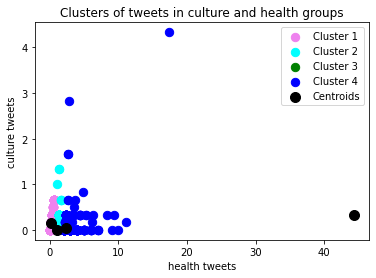

In [64]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=70, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=70, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in culture and health groups')
plt.xlabel('health tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

 * KMeans with PCA

In [65]:
from sklearn.decomposition import PCA

In [66]:
seg = pivot_clusters.copy()
# seg = seg.drop

pca = PCA()
pca.fit(seg)

PCA()

In [67]:
pca.explained_variance_ratio_

array([6.82898659e-01, 2.54091813e-01, 5.51511842e-02, 7.85834381e-03,
       8.16231143e-30, 4.40353682e-34, 7.29161197e-65])

Text(0, 0.5, 'cummulative explained variance')

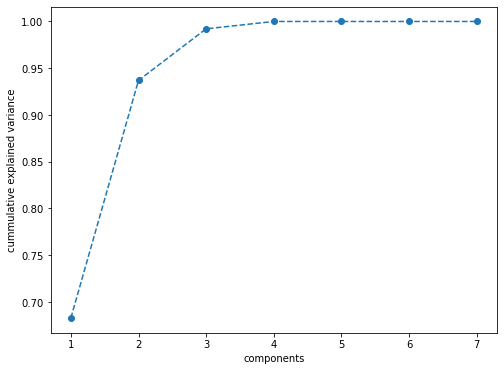

In [68]:
plt.figure(figsize = (8,6))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')

In [69]:
pca = PCA(n_components = 3)
pca.fit(seg)

PCA(n_components=3)

In [70]:
scores = pca.transform(seg)

Text(0, 0.5, 'wcss')

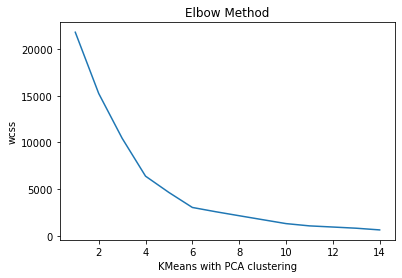

In [71]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('KMeans with PCA clustering')
plt.ylabel('wcss')

In [72]:
n = 6
kmeans_pca = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
kmeans_pca.fit(scores)

KMeans(n_clusters=6, random_state=0)

In [73]:
c = pd.concat([seg.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
c.columns.values[-2:] = ['component1', 'component2']
c['segment_kmeans_pca'] = kmeans_pca.labels_

In [74]:
c.tail()

,economic,social,culture,health,politics,sport,total,0,component1,component2,segment_kmeans_pca
18079,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,2.0,0.431820,0.942153,-0.471136,4
18080,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,-0.126197,-0.269561,-0.009570,1
18081,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,2.0,0.431820,0.942153,-0.471136,4
18082,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,-0.126197,-0.269561,-0.009570,1
18083,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,-0.126197,-0.269561,-0.009570,1


Text(0.5, 1.0, 'Clusters by PCA')

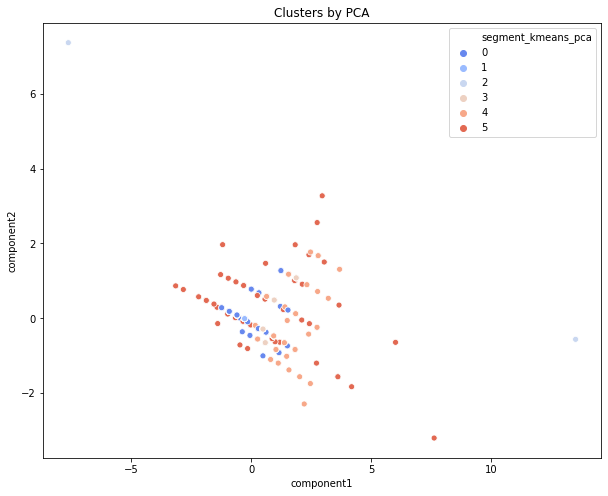

In [75]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = c['component1'], y = c['component2'], hue = c['segment_kmeans_pca'], palette=sns.color_palette('coolwarm', n_colors=6),legend="brief")
plt.title('Clusters by PCA')
